In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np


### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

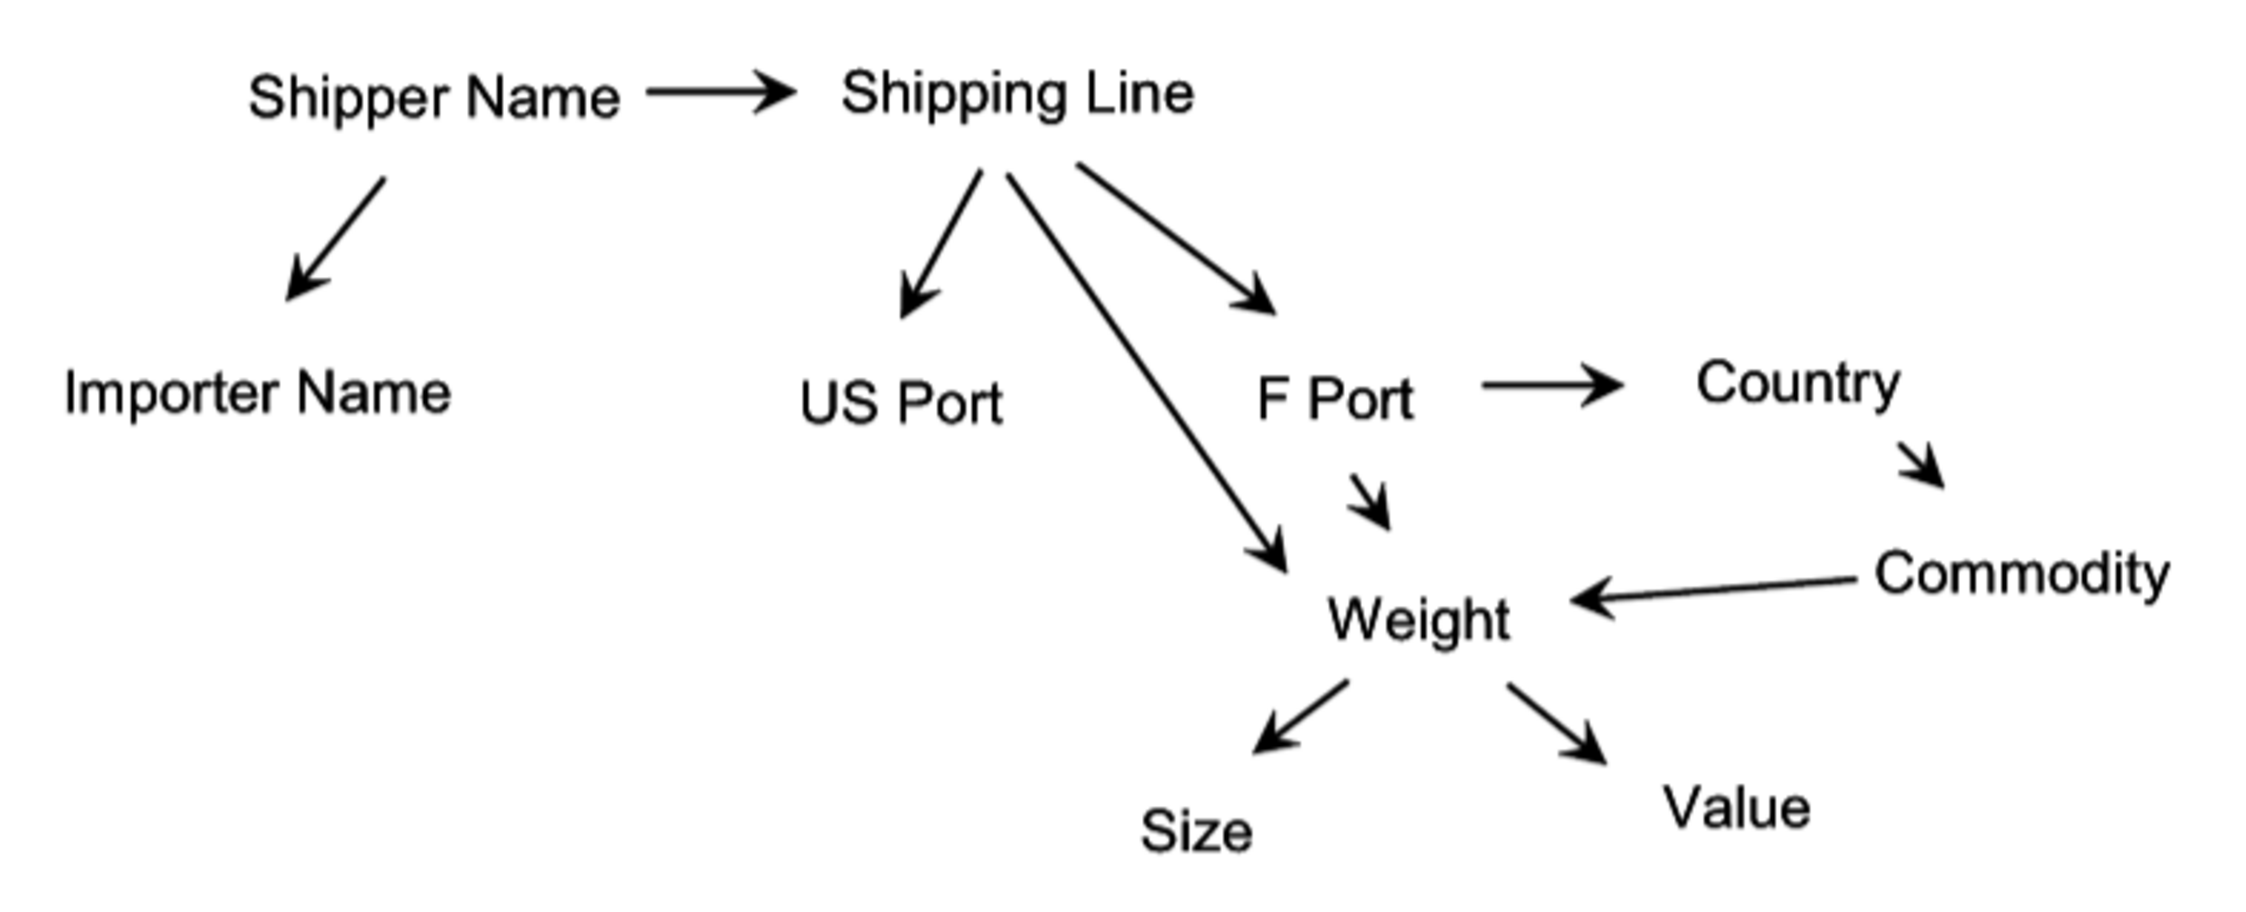

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)? dependent

CI (Shipper Name, Value | Shipping Line)? independent

CI (Foreign Port, Commodity | Country)? independent

CI (Foreign Port, Commodity | County, Weight)? independent

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

a) A heavy package shipped from Vancouver to Seattle by ASCO

$P(Heavy, Vancouver, Seattle|ASCO) = 0.2 * 1.0 * 1.0 * 0.3 = 0.06$

b) A heavy package shipped from Vancouver to Seattle by CSCO

$P(Heavy, Vancouver, Seattle|CSCO) = 0.15 * 0.60 * 0.80 * 0.7 = 0.0504$

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

$P(Heavy, Yokohama, Los Angeles|CSCO) = 0.6 * 0.4 * 0.2 * 0.7 = 0.0336 $


#####  The package c is likely to be most anamalous from the likelihood calculation above

(Your answers here, including all calculations)

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

A  B  C  D  E  F
0  1  0  0  0  1  1
1  2  0  0  1  0  1
2  3  1  0  1  1  1
3  2  0  0  1  1  1
4  1  0  1  0  1  1

a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [4]:
#a 
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

hc = HillClimbSearch(data2, scoring_method=BicScore(data2))
best_model = hc.estimate()
print(best_model.edges())

[('B', 'A'), ('D', 'A'), ('F', 'A')]


In [5]:
#b
#from professor lab notes
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
best_model.fit(data2, estimator=BayesianEstimator, prior_type='K2') #need to specify prior type
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable)) #look at probability distributions
    print(cpd)

CPD of A:
╒══════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│ B    │ B(0)                  │ B(0)                  │ B(0)                  │ B(0)                  │ B(1)                  │ B(1)                  │ B(1)                  │ B(1)                  │
├──────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ D    │ D(0)                  │ D(0)                  │ D(1)                  │ D(1)                  │ D(0)                  │ D(0)                  │ D(1)                  │ D(1)                  │
├──────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┼──────────

In [6]:
#c
predicted_test = best_model.predict(test.loc[:,"B":"F"])
print("Out of sample:",(test.loc[:,'A']==predicted_test['A']).mean())

Out of sample: 0.51425


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [7]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

crime_type Category   day_Sun   day_Mon  \
0                          ARSON: BY FIRE      P1P  0.138810  0.135977   
1     ASSAULT: AGG PO HANDS NO/MIN INJURY       P2  0.151852  0.118519   
2            ASSAULT: AGGRAVATED: HANDGUN      P1V  0.149912  0.139405   
3  ASSAULT: AGGRAVATED: OTHER DANG WEAPON      P1V  0.125000  0.139000   
4      ASSAULT: AGGRAVATED: OTHER FIREARM      P1V  0.156863  0.107843   

    day_Tue   day_Wed   day_Thu   day_Fri   day_Sat    hour_0  \
0  0.155807  0.121813  0.130312  0.147309  0.169972  0.073654   
1  0.162963  0.122222  0.129630  0.129630  0.185185  0.055556   
2  0.141506  0.131349  0.136953  0.133100  0.167776  0.040630   
3  0.148000  0.153000  0.133000  0.142000  0.160000  0.034000   
4  0.166667  0.117647  0.147059  0.117647  0.186275  0.009804   

         ...          community_area_68  community_area_69  community_area_70  \
0        ...                   0.019830           0.016997           0.019830   
1        ...                   0.037037           0.048148           0.018519   
2        ...                   0.035377           0.031524           0.013310   
3        ...                   0.028000           0.030000           0.014000   
4        ...                   0.029412           0.019608           0.009804   

   community_area_71  community_area_72  community_area_73  community_area_74  \
0           0.022663           0.005666           0.000000           0.002833   
1           0.025926           0.003704           0.003704           0.003704   
2           0.042732           0.002102           0.017863           0.000000   
3           0.037000           0.003000           0.010000           0.002000   
4           0.019608           0.000000           0.000000           0.000000   

   community_area_75  community_area_76  community_area_77  
0           0.005666           0.000000           0.002833  
1           0.011111           0.011111           0.007407  
2           0.012259           0.002102           0.003152  
3           0.002000           0.003000           0.006000  
4           0.009804           0.000000           0.000000  

[5 rows x 110 columns]

In [8]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
0                      1         Rogers Park  1164399.219  1947666.815   
1                      2          West Ridge  1158307.200  1943243.722   
2                      3              Uptown  1168228.082  1930980.022   
3                      4      Lincoln Square  1159618.804  1933105.743   
4                      5        North Center  1161104.228  1924056.010   

   PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
0                         7.7                              23.6   
1                         7.8                              17.2   
2                         3.8                              24.0   
3                         3.4                              10.9   
4                         0.3                               7.5   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                          8.7                                          18.2   
1                          8.8                                          20.8   
2                          8.9                                          11.8   
3                          8.2                                          13.4   
4                          5.2                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
0                              27.5               23939   
1                              38.5               23040   
2                              22.2               35787   
3                              25.5               37524   
4                              26.2               57123   

   PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
0                        11.870556             3420  
1                         9.870385             3068  
2                         8.672137             3330  
3                         8.600422             1859  
4                        10.100636             1280

In [9]:
cols = list(data3.loc[:,'hour_0':'hour_23']) + ['crime_type']
cluster_data = data3[cols].set_index('crime_type')


In [10]:
cluster_data.head()

hour_0    hour_1    hour_2  \
crime_type                                                             
ARSON: BY FIRE                          0.073654  0.079320  0.076487   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.055556  0.070370  0.033333   
ASSAULT: AGGRAVATED: HANDGUN            0.040630  0.039580  0.033275   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.034000  0.026000  0.018000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.009804  0.009804  0.029412   

                                          hour_3    hour_4    hour_5  \
crime_type                                                             
ARSON: BY FIRE                          0.087819  0.082153  0.073654   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.014815  0.025926  0.003704   
ASSAULT: AGGRAVATED: HANDGUN            0.036778  0.018564  0.014011   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.009000  0.010000  0.015000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.009804  0.009804  0.019608   

                                          hour_6    hour_7    hour_8  \
crime_type                                                             
ARSON: BY FIRE                          0.039660  0.033994  0.014164   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.007407  0.014815  0.018519   
ASSAULT: AGGRAVATED: HANDGUN            0.012609  0.021366  0.025569   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.020000  0.017000  0.033000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.039216  0.019608  0.000000   

                                          hour_9    ...      hour_14  \
crime_type                                          ...                
ARSON: BY FIRE                          0.016997    ...     0.019830   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.029630    ...     0.055556   
ASSAULT: AGGRAVATED: HANDGUN            0.034676    ...     0.055342   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.036000    ...     0.045000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.029412    ...     0.029412   

                                         hour_15   hour_16   hour_17  \
crime_type                                                             
ARSON: BY FIRE                          0.019830  0.025496  0.022663   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.077778  0.048148  0.059259   
ASSAULT: AGGRAVATED: HANDGUN            0.052189  0.059895  0.056392   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.058000  0.073000  0.078000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.009804  0.107843  0.117647   

                                         hour_18   hour_19   hour_20  \
crime_type                                                             
ARSON: BY FIRE                          0.022663  0.053824  0.033994   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.044444  0.044444  0.077778   
ASSAULT: AGGRAVATED: HANDGUN            0.062347  0.051839  0.053240   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.068000  0.066000  0.059000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.058824  0.068627  0.078431   

                                         hour_21   hour_22   hour_23  
crime_type                                                            
ARSON: BY FIRE                          0.033994  0.042493  0.062323  
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.044444  0.074074  0.044444  
ASSAULT: AGGRAVATED: HANDGUN            0.066550  0.055692  0.056042  
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.038000  0.051000  0.041000  
ASSAULT: AGGRAVATED: OTHER FIREARM      0.068627  0.049020  0.088235  

[5 rows x 24 columns]

In [11]:
# Use k-means package from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=300).fit(cluster_data)
cluster_data['cluster'] = kmeans.predict(cluster_data)
cluster_data.head()

hour_0    hour_1    hour_2  \
crime_type                                                             
ARSON: BY FIRE                          0.073654  0.079320  0.076487   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.055556  0.070370  0.033333   
ASSAULT: AGGRAVATED: HANDGUN            0.040630  0.039580  0.033275   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.034000  0.026000  0.018000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.009804  0.009804  0.029412   

                                          hour_3    hour_4    hour_5  \
crime_type                                                             
ARSON: BY FIRE                          0.087819  0.082153  0.073654   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.014815  0.025926  0.003704   
ASSAULT: AGGRAVATED: HANDGUN            0.036778  0.018564  0.014011   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.009000  0.010000  0.015000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.009804  0.009804  0.019608   

                                          hour_6    hour_7    hour_8  \
crime_type                                                             
ARSON: BY FIRE                          0.039660  0.033994  0.014164   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.007407  0.014815  0.018519   
ASSAULT: AGGRAVATED: HANDGUN            0.012609  0.021366  0.025569   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.020000  0.017000  0.033000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.039216  0.019608  0.000000   

                                          hour_9   ...      hour_15   hour_16  \
crime_type                                         ...                          
ARSON: BY FIRE                          0.016997   ...     0.019830  0.025496   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.029630   ...     0.077778  0.048148   
ASSAULT: AGGRAVATED: HANDGUN            0.034676   ...     0.052189  0.059895   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.036000   ...     0.058000  0.073000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.029412   ...     0.009804  0.107843   

                                         hour_17   hour_18   hour_19  \
crime_type                                                             
ARSON: BY FIRE                          0.022663  0.022663  0.053824   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.059259  0.044444  0.044444   
ASSAULT: AGGRAVATED: HANDGUN            0.056392  0.062347  0.051839   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.078000  0.068000  0.066000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.117647  0.058824  0.068627   

                                         hour_20   hour_21   hour_22  \
crime_type                                                             
ARSON: BY FIRE                          0.033994  0.033994  0.042493   
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.077778  0.044444  0.074074   
ASSAULT: AGGRAVATED: HANDGUN            0.053240  0.066550  0.055692   
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.059000  0.038000  0.051000   
ASSAULT: AGGRAVATED: OTHER FIREARM      0.078431  0.068627  0.049020   

                                         hour_23  cluster  
crime_type                                                 
ARSON: BY FIRE                          0.062323        0  
ASSAULT: AGG PO HANDS NO/MIN INJURY     0.044444        0  
ASSAULT: AGGRAVATED: HANDGUN            0.056042        0  
ASSAULT: AGGRAVATED: OTHER DANG WEAPON  0.041000        0  
ASSAULT: AGGRAVATED: OTHER FIREARM      0.088235        0  

[5 rows x 25 columns]

In [12]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
# plt.rcParams['figure.figsize'] = 18,8


In [13]:
#a
# grouping by cluster mean
cluster_hour = cluster_data.groupby('cluster').mean()
cluster_hour

hour_0    hour_1    hour_2    hour_3    hour_4    hour_5    hour_6  \
cluster                                                                         
0        0.053642  0.041824  0.036912  0.031042  0.025106  0.018864  0.019462   
1        0.042486  0.012484  0.010632  0.009173  0.009353  0.007823  0.013453   
2        0.025789  0.014926  0.011240  0.006105  0.002769  0.001359  0.003941   

           hour_7    hour_8    hour_9    ...      hour_14   hour_15   hour_16  \
cluster                                  ...                                    
0        0.024342  0.027668  0.033517    ...     0.042090  0.047396  0.051701   
1        0.023746  0.050991  0.092355    ...     0.063096  0.068246  0.062162   
2        0.008602  0.012127  0.024071    ...     0.057547  0.044079  0.039107   

          hour_17   hour_18   hour_19   hour_20   hour_21   hour_22   hour_23  
cluster                                                                        
0        0.054259  0.057579  0.055997  0.057573  0.054118  0.058373  0.052035  
1        0.052158  0.049157  0.041648  0.034145  0.024767  0.021921  0.018831  
2        0.043985  0.073090  0.106785  0.091043  0.080099  0.065787  0.039175  

[3 rows x 24 columns]

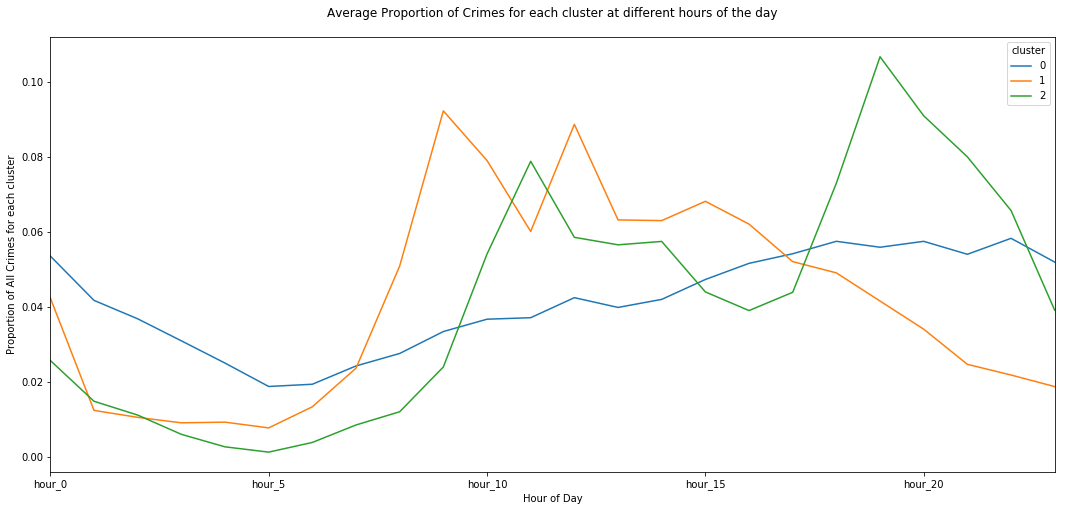

In [29]:
# plot clusters by time of day
cluster_hour.T.plot(figsize = (18,8))

plt.title('Average Proportion of Crimes for each cluster at different hours of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of All Crimes for each cluster');

#b 
### Figure 1: Average Proportion of Crimes for each cluster at different hours of the day

#### Cluster 0 shows that the rate of occurence of crime is higher during the day time. It is relatively lower in early morning, but starts to increase a the day goes by. The rate is higher in the late evening and peaks around 10 pm, after which it starts to drop.

#### Cluster 1 has 2 peaks. The first peak is in the morning around 9 am, and the second peak is around noon time. The occurence of crime rate is pretty low in the early morning and later night. The rate shoots up during the day, although it shows a bit of erratic behaviour over here.

#### Cluster 2 also has 2 peaks. The rate of occurence is relativerly low in the early morning and late night. The rate increases increases from  around 9:00 onwards, and peaks around noon, after which it starts to decrease. It again shoots after around 5pm, reaching the global maxima at around 7pm, after which it starts to decrease again.

#### If we compare the three clusters, cluster 2 and 3 shows higher occurence of crime rate as compared to cluster 1.

In [15]:
#c
classes = kmeans.labels_
classes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 0], dtype=int32)

In [16]:
data3['classes'] = classes
data3.head()

crime_type Category   day_Sun   day_Mon  \
0                          ARSON: BY FIRE      P1P  0.138810  0.135977   
1     ASSAULT: AGG PO HANDS NO/MIN INJURY       P2  0.151852  0.118519   
2            ASSAULT: AGGRAVATED: HANDGUN      P1V  0.149912  0.139405   
3  ASSAULT: AGGRAVATED: OTHER DANG WEAPON      P1V  0.125000  0.139000   
4      ASSAULT: AGGRAVATED: OTHER FIREARM      P1V  0.156863  0.107843   

    day_Tue   day_Wed   day_Thu   day_Fri   day_Sat    hour_0   ...     \
0  0.155807  0.121813  0.130312  0.147309  0.169972  0.073654   ...      
1  0.162963  0.122222  0.129630  0.129630  0.185185  0.055556   ...      
2  0.141506  0.131349  0.136953  0.133100  0.167776  0.040630   ...      
3  0.148000  0.153000  0.133000  0.142000  0.160000  0.034000   ...      
4  0.166667  0.117647  0.147059  0.117647  0.186275  0.009804   ...      

   community_area_69  community_area_70  community_area_71  community_area_72  \
0           0.016997           0.019830           0.022663           0.005666   
1           0.048148           0.018519           0.025926           0.003704   
2           0.031524           0.013310           0.042732           0.002102   
3           0.030000           0.014000           0.037000           0.003000   
4           0.019608           0.009804           0.019608           0.000000   

   community_area_73  community_area_74  community_area_75  community_area_76  \
0           0.000000           0.002833           0.005666           0.000000   
1           0.003704           0.003704           0.011111           0.011111   
2           0.017863           0.000000           0.012259           0.002102   
3           0.010000           0.002000           0.002000           0.003000   
4           0.000000           0.000000           0.009804           0.000000   

   community_area_77  classes  
0           0.002833        0  
1           0.007407        0  
2           0.003152        0  
3           0.006000        0  
4           0.000000        0  

[5 rows x 111 columns]

In [17]:
data3.groupby(['classes','crime_type']).size()

classes  crime_type                                                          
0        ARSON: BY FIRE                                                          1
         ASSAULT: AGG PO HANDS NO/MIN INJURY                                     1
         ASSAULT: AGGRAVATED: HANDGUN                                            1
         ASSAULT: AGGRAVATED: OTHER DANG WEAPON                                  1
         ASSAULT: AGGRAVATED: OTHER FIREARM                                      1
         ASSAULT: AGGRAVATED:KNIFE/CUTTING INSTR                                 1
         ASSAULT: SIMPLE                                                         1
         BATTERY: AGG PO HANDS NO/MIN INJURY                                     1
         BATTERY: AGG: HANDS/FIST/FEET NO/MINOR INJURY                           1
         BATTERY: AGG: HANDS/FIST/FEET SERIOUS INJURY                            1
         BATTERY: AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY    1
         

#### There are clear patters in the clusters. The majority of the crime type lie in the cluster 1 and 3 and have relatively more serious crimes than the crimes in the cluster 3. Cluster 2 a lot of crime related narcotics, prositution. Cluster 0 has crimes related to burglary and assault, criminal sexual assault. Cluster 1 has crimes mainly related to theft, bomb threat and other offenses.

In [18]:
#d
cols_day_week = list(data3.loc[:,'day_Sun':'day_Sat']) + ['classes']
Day_of_Week = data3[cols_day_week]

In [19]:
Day_of_Week.head()

day_Sun   day_Mon   day_Tue   day_Wed   day_Thu   day_Fri   day_Sat  \
0  0.138810  0.135977  0.155807  0.121813  0.130312  0.147309  0.169972   
1  0.151852  0.118519  0.162963  0.122222  0.129630  0.129630  0.185185   
2  0.149912  0.139405  0.141506  0.131349  0.136953  0.133100  0.167776   
3  0.125000  0.139000  0.148000  0.153000  0.133000  0.142000  0.160000   
4  0.156863  0.107843  0.166667  0.117647  0.147059  0.117647  0.186275   

   classes  
0        0  
1        0  
2        0  
3        0  
4        0

In [20]:
dow_clusters = Day_of_Week.groupby(classes).mean()
dow_clusters = dow_clusters.drop('classes', axis=1).T

Text(0.5,0,'Day of Week')

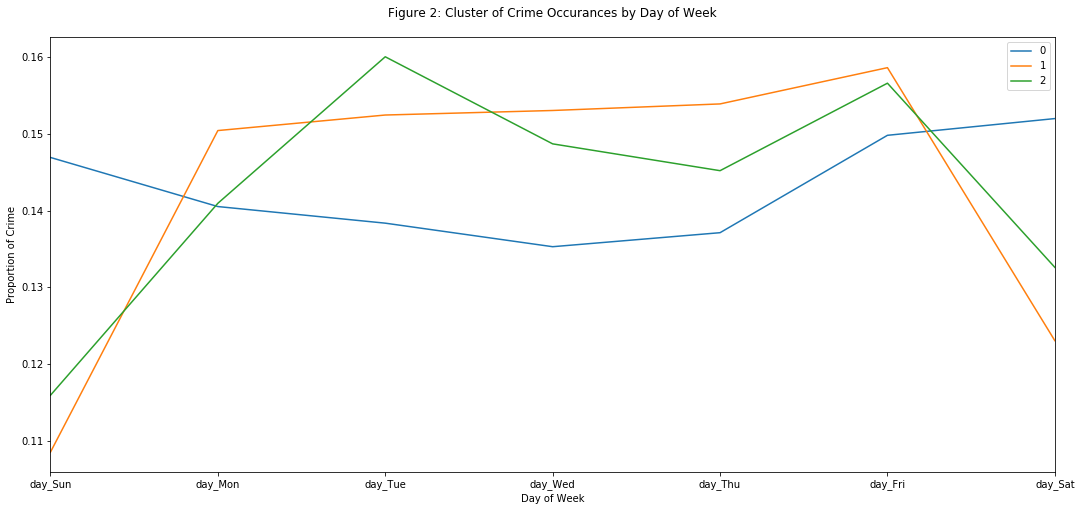

In [30]:
dow_clusters.plot(figsize = (18,8))
plt.title('Figure 2: Cluster of Crime Occurances by Day of Week')
plt.ylabel('Proportion of Crime')
plt.xlabel('Day of Week')

### Figure 2: Cluster of crime occurances by the day of week.

####  Here, cluster 0 crime is highest on Friday and during the weekends, and lowest during the weekdays. The clusters 1 and 2 show inverse trends as compared to cluster 0, with crimes (of cluster 1 and 2) mainly occuring during the week.

In [22]:
#e
data3.head()

crime_type Category   day_Sun   day_Mon  \
0                          ARSON: BY FIRE      P1P  0.138810  0.135977   
1     ASSAULT: AGG PO HANDS NO/MIN INJURY       P2  0.151852  0.118519   
2            ASSAULT: AGGRAVATED: HANDGUN      P1V  0.149912  0.139405   
3  ASSAULT: AGGRAVATED: OTHER DANG WEAPON      P1V  0.125000  0.139000   
4      ASSAULT: AGGRAVATED: OTHER FIREARM      P1V  0.156863  0.107843   

    day_Tue   day_Wed   day_Thu   day_Fri   day_Sat    hour_0   ...     \
0  0.155807  0.121813  0.130312  0.147309  0.169972  0.073654   ...      
1  0.162963  0.122222  0.129630  0.129630  0.185185  0.055556   ...      
2  0.141506  0.131349  0.136953  0.133100  0.167776  0.040630   ...      
3  0.148000  0.153000  0.133000  0.142000  0.160000  0.034000   ...      
4  0.166667  0.117647  0.147059  0.117647  0.186275  0.009804   ...      

   community_area_69  community_area_70  community_area_71  community_area_72  \
0           0.016997           0.019830           0.022663           0.005666   
1           0.048148           0.018519           0.025926           0.003704   
2           0.031524           0.013310           0.042732           0.002102   
3           0.030000           0.014000           0.037000           0.003000   
4           0.019608           0.009804           0.019608           0.000000   

   community_area_73  community_area_74  community_area_75  community_area_76  \
0           0.000000           0.002833           0.005666           0.000000   
1           0.003704           0.003704           0.011111           0.011111   
2           0.017863           0.000000           0.012259           0.002102   
3           0.010000           0.002000           0.002000           0.003000   
4           0.000000           0.000000           0.009804           0.000000   

   community_area_77  classes  
0           0.002833        0  
1           0.007407        0  
2           0.003152        0  
3           0.006000        0  
4           0.000000        0  

[5 rows x 111 columns]

In [23]:
community = data3.loc[:, 'community_area_1':'classes']
community = community.groupby('classes').sum().reset_index()

In [24]:
#community areas with disproportionate amounts in each cluster
community.idxmax(axis=1)

0    community_area_25
1     community_area_8
2    community_area_25
dtype: object

In [25]:
#filter for these community areas
data4.loc[data4['Community Area Number'].isin([8, 25])]

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
7                       8     Near North Side  1175512.220  1906089.147   
24                     25              Austin  1140839.462  1903174.321   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
7                          1.9                              12.9   
24                         6.3                              28.6   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
7                           7.0                                           2.5   
24                         22.6                                          24.4   

    PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
7                               22.6               88669   
24                              37.9               15957   

    PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
7                         17.077160             9847  
24                        14.188517            15719

In [26]:
data4.ix[:, 4:].max()

/Users/ishachaturvedi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


PERCENT OF HOUSING CROWDED                         15.800000
PERCENT HOUSEHOLDS BELOW POVERTY                   56.500000
PERCENT AGED 16+ UNEMPLOYED                        35.900000
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA       54.800000
PERCENT AGED UNDER 18 OR OVER 64                   51.500000
PER CAPITA INCOME                               88669.000000
PERCENT OF HOUSING UNITS VACANT                    29.411765
NUM_CRIMES_2016                                 15719.000000
dtype: float64

#### After comparing the characteristics of community area 25 and 8 with the characteristics of other communities, we can see that community area 8 is relatively better with lower amount of housing crowd, household below poverty, unemployment. It has the highest per capita income, which might  be the reason for it fall under cluster 1 type crimes.  In comparision to this community area 25 has above average level of crowded housing, households that are below poverty, unemployment and population without a diploma. The per capita income is significantly lower as compared to that of community area 25, and the number of crimes that occured in 2016 is also significantly higher for community area 25 than in 8 . These characteristics may be the reason for this area to have crimes of both cluster 0 and 2 types.

In [31]:
#f
FBI_Comp = data3[['Category', 'classes']]
FBI_Comp.head()

Category  classes
0      P1P        0
1       P2        0
2      P1V        0
3      P1V        0
4      P1V        0

In [32]:
FBI_Comp.groupby(['classes', 'Category']).size()

classes  Category
0        P1P         11
         P1V         24
         P2          34
1        P1P          4
         P2          23
2        P2          23
dtype: int64

#### The classes formed after clustering doesn't clearly mirror the FBI's division. Class 0 have a good number of crimes in each of the three FBI divisions with the majorty being in P1V and P2. Class 1 has majorly P2 and Class 2 falls entirely in P2.

In [33]:
#g
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import collections

np.random.seed(14353)

In [34]:
df_dayoweek = pd.DataFrame(data3.loc[:,'day_Sun':'day_Sat'])
df_dayoweek.index = data3.crime_type

##### Most of the code below is from Professor Stan's ADS and Professor Daniel' MLC notebooks

#### Kmeans

In [35]:
range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    cluster_labels= KMeans(n_clusters, random_state=1).fit(df_dayoweek).labels_
    silhouette_avg = silhouette_score(df_dayoweek, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.2365303906851532
For n_clusters = 3, the average silhouette_score is : 0.2256157252938588
For n_clusters = 4, the average silhouette_score is : 0.22389280774655906
For n_clusters = 5, the average silhouette_score is : 0.2398335428706663
For n_clusters = 6, the average silhouette_score is : 0.16023468146585954
For n_clusters = 7, the average silhouette_score is : 0.18302593684060087
For n_clusters = 8, the average silhouette_score is : 0.16128901421505432
For n_clusters = 9, the average silhouette_score is : 0.18082859101435006
For n_clusters = 10, the average silhouette_score is : 0.1671311637459432
For n_clusters = 11, the average silhouette_score is : 0.16786821570453866


##### The silhoutte score is highest for number of cluster = 5

In [37]:
km = KMeans(random_state=100,n_clusters=5)
kmeans_res =km.fit(df_dayoweek)
print ('Cluster assignments:',kmeans_res.labels_)
print ('Number of elements in each cluster:\n',collections.Counter(kmeans_res.labels_))

Cluster assignments: [2 2 2 0 2 2 3 0 2 0 2 2 2 2 2 2 2 2 2 3 2 0 0 0 0 0 2 0 0 2 3 2 0 0 0 2 3
 3 3 2 0 3 3 3 3 2 2 0 0 2 2 2 4 2 2 2 0 0 3 0 0 1 0 0 2 0 0 2 0 0 0 2 0 0
 4 1 0 0 3 0 0 1 0 2 2 0 0 2 3 0 0 0 1 3 0 0 2 0 0 2 0 0 2 2 1 0 0 2 0 0 0
 0 2 0 0 2 2 2 0]
Number of elements in each cluster:
 Counter({0: 54, 2: 44, 3: 14, 1: 5, 4: 2})


#### Gaussian Mixture Model

In [39]:
range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    g_res= GaussianMixture(n_clusters,random_state=111).fit(df_dayoweek)
    silhouette_avg = silhouette_score(df_dayoweek, g_res.predict(df_dayoweek))
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.2946566408627777
For n_clusters = 3, the average silhouette_score is : 0.11815175902408263
For n_clusters = 4, the average silhouette_score is : 0.25982110318075763
For n_clusters = 5, the average silhouette_score is : 0.15246493672001088
For n_clusters = 6, the average silhouette_score is : 0.15778079629247482
For n_clusters = 7, the average silhouette_score is : 0.15503132134082523
For n_clusters = 8, the average silhouette_score is : 0.1231748930550366
For n_clusters = 9, the average silhouette_score is : 0.1062561410044545
For n_clusters = 10, the average silhouette_score is : 0.10347177595194151
For n_clusters = 11, the average silhouette_score is : 0.11393084347481058


##### The silhoutte score is highest for number of cluster = 2

In [42]:
gmm = GaussianMixture(n_components=2,random_state=355)
gmm_res = gmm.fit(df_dayoweek)
print ('Number of elements in cluster 1:\n',len(gmm_res.predict(df_dayoweek)[gmm_res.predict(df_dayoweek) == 1]))
print ('Number of elements in cluster 2:\n',len(gmm_res.predict(df_dayoweek)[gmm_res.predict(df_dayoweek) == 0]))
print ('\nCluster centers:\n',gmm_res.means_)
#print ('\nCluster covariances:\n',res.covariances_)
print ('\nLog-likelihood per sample:',gmm_res.score(df_dayoweek))


Number of elements in cluster 1:
 30
Number of elements in cluster 2:
 89

Cluster centers:
 [[ 0.14374577  0.14214832  0.13882126  0.13809564  0.13851687  0.14902967
   0.14964246]
 [ 0.10306846  0.14462626  0.16324958  0.15153884  0.15251181  0.1634716
   0.12153345]]

Log-likelihood per sample: 19.6117823484


#### Single Link

In [43]:
range_n_clusters = range(2,12)
single_link = linkage(df_dayoweek, 'single')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(single_link, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(df_dayoweek, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6377648080667613
For n_clusters = 3, the average silhouette_score is : 0.5568477382969328
For n_clusters = 4, the average silhouette_score is : 0.40557775075981567
For n_clusters = 5, the average silhouette_score is : 0.38770381887486705
For n_clusters = 6, the average silhouette_score is : 0.3900761951022192
For n_clusters = 7, the average silhouette_score is : 0.3462184482039438
For n_clusters = 8, the average silhouette_score is : 0.32899815764355905
For n_clusters = 9, the average silhouette_score is : 0.32542192748924165
For n_clusters = 10, the average silhouette_score is : 0.3132151039050357
For n_clusters = 11, the average silhouette_score is : 0.21831462782301697


##### The silhoutte score is highest for number of cluster = 2

In [44]:
cluster_slink = fcluster(single_link, 2, criterion='maxclust')
print ('\nNumber of elements in each cluster:\n',collections.Counter(cluster_slink))


Number of elements in each cluster:
 Counter({1: 118, 2: 1})


#### Complete Link

In [45]:
range_n_clusters = range(2,12)
Z_complete = linkage(df_dayoweek, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z_complete, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(df_dayoweek, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6100646113547021
For n_clusters = 3, the average silhouette_score is : 0.17268718146566123
For n_clusters = 4, the average silhouette_score is : 0.19215169374768618
For n_clusters = 5, the average silhouette_score is : 0.15025207822499775
For n_clusters = 6, the average silhouette_score is : 0.15229681572228093
For n_clusters = 7, the average silhouette_score is : 0.14926267616109448
For n_clusters = 8, the average silhouette_score is : 0.10130440123428044
For n_clusters = 9, the average silhouette_score is : 0.10066503899164778
For n_clusters = 10, the average silhouette_score is : 0.11061132431547081
For n_clusters = 11, the average silhouette_score is : 0.12537141856431583


##### The silhoutte score is highest for number of cluster = 2


In [46]:
cluster_cl = fcluster(Z_complete, t=2, criterion='maxclust')
print ('\nNumber of elements in each cluster:\n',collections.Counter(cluster_cl))


Number of elements in each cluster:
 Counter({2: 117, 1: 2})


#### According to the silhouette scores calculated above for 5 clusteing methods, 3 out of 4 predicted the same optimal number of clusters (2), while K-means gave an optimal number = 5. The cluster of two different sizes are printed below:

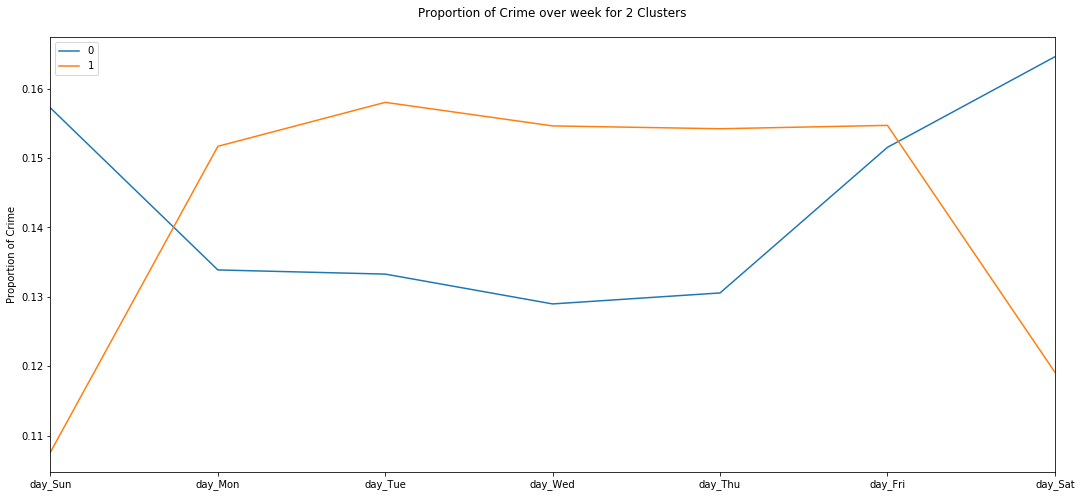

In [49]:
df_dayoweek.groupby(KMeans(2).fit(df_dayoweek).labels_).mean().T.plot(figsize = (18,8))
plt.title('Proportion of Crime over week for 2 Clusters')
plt.ylabel('Proportion of Crime');

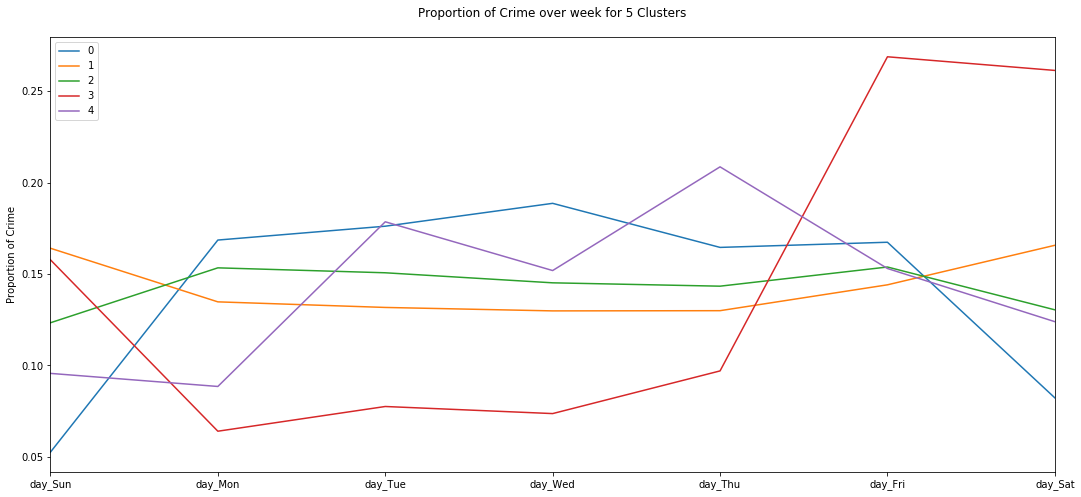

In [50]:
df_dayoweek.groupby(KMeans(5).fit(df_dayoweek).labels_).mean().T.plot(figsize = (18,8))
plt.title('Proportion of Crime over week for 5 Clusters')
plt.ylabel('Proportion of Crime');

### Figure 3: Proportion of Crime over week for 2  and 5 Clusters respectively

#### The 2 cluster grouping doesn't show much patters except that the cluster 0 group crimes occur mainly during the weeks while the cluster 1 group have crimes during the weekend. 

#### The 5 clusters depicts more practical real life trends for occurence of crime. The occurence of crime depends on number of factors, such as when people are at work or at home, when people go in parties and are out drinking. The cluster size = 5 shows the occurence of crime relies on number of complicated factors and not just standard day of the week rule.